In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops 

from collections import Counter 
import pandas as pd
import numpy as np
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [3]:
# dir path for sample dataset
dir_path = os.getcwd() 
dataset_path = dir_path + '\\Dataset\\'
dataset2_path = dir_path + '\\Dataset2\\'
print(dataset_path)

C:\Users\adilf\Deeplearning Projects\hackerearth#5\Dataset\


In [4]:
X = []
Y = []

x_true = []
x_false = []

In [5]:
for folderName, subfolders, filenames in os.walk(dataset_path):
    for subfolder in subfolders:
        for _,sF,_ in os.walk(dataset_path+subfolder):
            if(len(sF) != 0):
                for _,_,im in os.walk(dataset_path+subfolder+'\\'+sF[0]+'\\'):
                    for i in im:
                        temp_img = image.load_img(dataset_path + subfolder + '\\' + sF[0] + '\\' + i,target_size=(224,224))
                        temp_img = image.img_to_array(temp_img)
                        X.append(temp_img)
                        x_true.append(temp_img)
                        Y.append(1)
                for _,_,im in os.walk(dataset_path+subfolder+'\\'+sF[1]+'\\'):
                    for i in im:
                        temp_img = image.load_img(dataset_path + subfolder + '\\' + sF[1] + '\\' + i,target_size=(224,224))
                        temp_img = image.img_to_array(temp_img)
                        X.append(temp_img)
                        x_false.append(temp_img)
                        Y.append(0)

In [6]:
x_true = np.array(x_true)
x_false = np.array(x_false)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen_true = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=False,
        fill_mode='nearest')

datagen_false = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=False,
        fill_mode='nearest')
datagen_true.fit(x_true)
datagen_false.fit(x_false)

In [ ]:
i = 0
for batch in datagen_true.flow(x_true, y=None, batch_size=32):
    i = i + 1
    if i >= 30:
        break
    for img in batch:
        X.append(img)
        Y.append(1)

In [ ]:
i = 0
for batch in datagen_true.flow(x_false, y=None, batch_size=32):
    i = i + 1
    if i >= 30:
        break
    for img in batch:
        X.append(img)
        Y.append(0)

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
X /= 255

In [ ]:
plt.imshow(X[2458])

In [ ]:
import h5py
with h5py.File('X.h5', 'w') as hf:
    hf.create_dataset("X",  data=X)
with h5py.File('Y.h5', 'w') as hf:
    hf.create_dataset("Y",  data=Y)

In [3]:
import h5py
with h5py.File('X.h5', 'r') as hf:
    X = hf['X'][:]
with h5py.File('Y.h5', 'r') as hf:
    Y = hf['Y'][:]

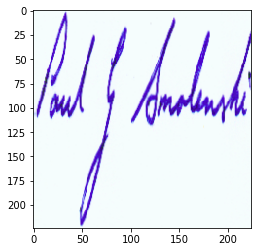

In [4]:
plt.imshow(X[2458])

In [9]:
X.shape

(720, 224, 224, 3)

In [10]:
from sklearn.model_selection import train_test_split
train_x, x, train_y, y = train_test_split(X, Y, test_size = 0.1, random_state = 1)
# test_x, val_x, test_y, val_y = train_test_split(x, y, test_size = 0.5, random_state = 1)

In [12]:
train_x.shape

(648, 224, 224, 3)

In [13]:
# vgg16 model 
model_vgg = VGG16(weights='imagenet', include_top=False)

In [ ]:
model_vgg.summary()

In [14]:
features_train = model_vgg.predict(train_x[:32])
# features_val = model_vgg.predict(val_x)

In [16]:
print(features_train.shape)
# print(features_val.shape)

(32, 7, 7, 512)


In [18]:
7*512

3584

In [ ]:
# Train_X = features_train.reshape(1984,25088)
# Val_X = features_val.reshape(248,25088)
Train_X = features_train.reshape(224,3584)

In [ ]:
from keras.utils.np_utils import to_categorical
Train_Y = to_categorical(train_y,num_classes=2)
Val_Y = to_categorical(val_y,num_classes=2)
Test_Y = to_categorical(test_y,num_classes=2)

<b><i>Class 1 - Forged</i></b> <br>
<b><i>Class 2 - Genuine</i></b>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
model=Sequential()

In [ ]:
# predicting model 

model.add(Dense(350,input_dim=3584,activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(50,input_dim=350,activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(10,input_dim=50,activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer="sgd",metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(Train_X,Train_Y,epochs=100,batch_size=64,validation_data=(Val_X,Val_Y))

In [ ]:
features_test = model_vgg.predict(test_x)

In [ ]:
features_test.shape

In [1]:
Test_X = features_test.reshape(248,25088)

NameError: name 'features_test' is not defined

In [44]:
model.evaluate(Test_X, y=Test_Y, batch_size=64, verbose=1)

248/248 [==============================] - 0s 229us/step


[4.2236549623550905, 0.46370968030345056]

In [45]:
predict_class = model.predict(Test_X)

In [50]:
predict_class[78]

array([9.9926573e-01, 7.3426490e-04], dtype=float32)

In [51]:
Test_Y[78]

array([0., 1.], dtype=float32)

In [ ]:
42.12195